In [162]:
# importing dependencies

#data manipulation
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

plt.style.use('ggplot')
%matplotlib inline

#quick eda
import ydata_profiling as pp

#feature engineering
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

#models packages
from sklearn.linear_model import LogisticRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#metrics and other
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

#other (if will be needed)
import os, pickle
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv('data/churn.csv', parse_dates=True).drop(columns='RowNumber')

In [90]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
display(df.shape)
display(df.describe())
display(df.isnull().sum())

(10000, 13)

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [92]:
df.duplicated().sum()

0

In [93]:
# gender to numeric

df['Is_Male'] = pd.to_numeric(df.Gender.apply(lambda x: 1 if x == 'Male' else 0))

df = df.drop(columns='Gender')

In [94]:
df

CustomerId    Surname  CreditScore Geography  Age  Tenure    Balance  \
0       15634602   Hargrave          619    France   42       2       0.00   
1       15647311       Hill          608     Spain   41       1   83807.86   
2       15619304       Onio          502    France   42       8  159660.80   
3       15701354       Boni          699    France   39       1       0.00   
4       15737888   Mitchell          850     Spain   43       2  125510.82   
...          ...        ...          ...       ...  ...     ...        ...   
9995    15606229   Obijiaku          771    France   39       5       0.00   
9996    15569892  Johnstone          516    France   35      10   57369.61   
9997    15584532        Liu          709    France   36       7       0.00   
9998    15682355  Sabbatini          772   Germany   42       3   75075.31   
9999    15628319     Walker          792    France   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Is_Male  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9995        1  
9996        1  
9997        0  
9998        1  
9999        0  

[10000 rows x 13 columns]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  Is_Male          10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [96]:
df["Exited"].value_counts().values

array([7963, 2037], dtype=int64)

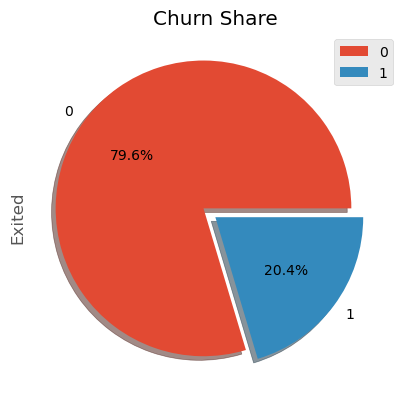

In [97]:
df.Exited.value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1,0], shadow=True)
plt.title('Churn Share')
plt.legend()


Text(0.5, 1.0, 'Customers churn by Gender')

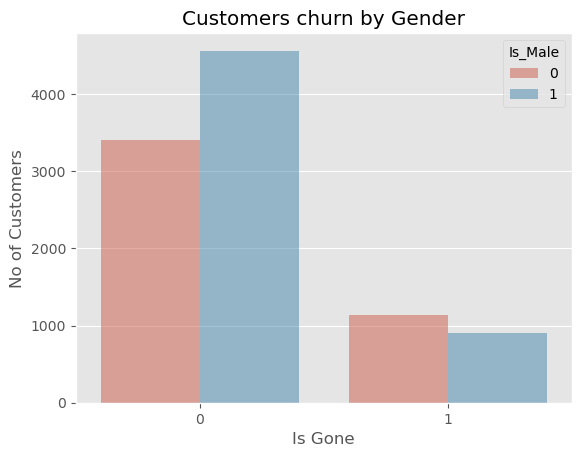

In [98]:
sns.countplot(x='Exited', data=df, hue='Is_Male', alpha=0.5)
plt.ylabel('No of Customers')
plt.xlabel('Is Gone')
plt.title('Customers churn by Gender')

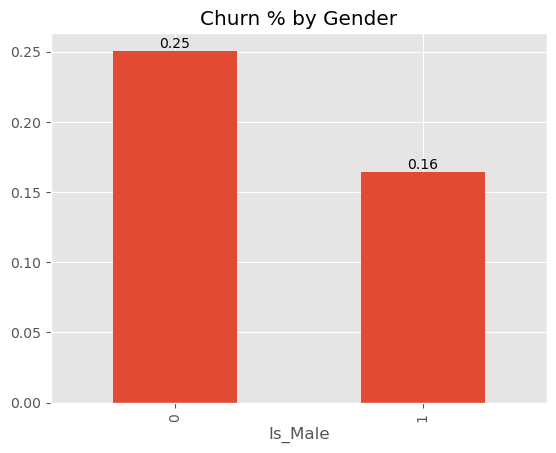

In [99]:
# churn % by gender

ax = df.groupby('Is_Male')['Exited'].mean().plot(kind='bar')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
plt.title('Churn % by Gender')
plt.show()

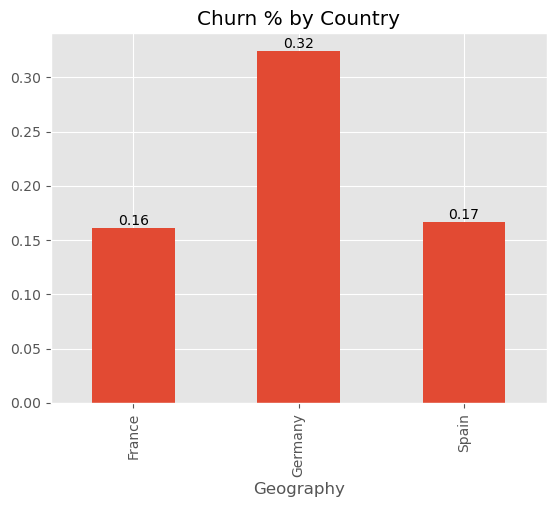

In [100]:
# churn % by country

ax = df.groupby('Geography')['Exited'].mean().plot(kind='bar')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
plt.title('Churn % by Country')
plt.show()

Text(0.5, 1.0, 'Salary by Gender')

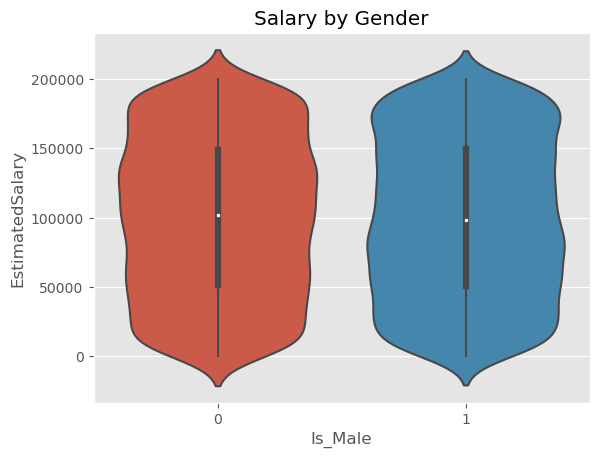

In [101]:
sns.violinplot(x='Is_Male', y='EstimatedSalary', data=df)
plt.title('Salary by Gender')

Text(0.5, 1.0, 'Balance by Gender')

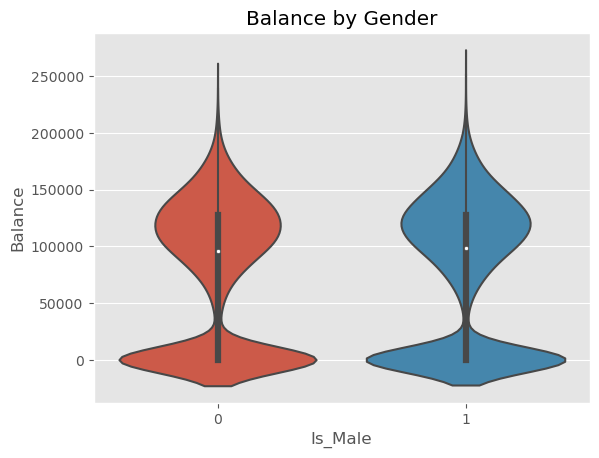

In [102]:
sns.violinplot(x='Is_Male', y='Balance', data=df)
plt.title('Balance by Gender')

Text(0.5, 1.0, 'Balance by Country')

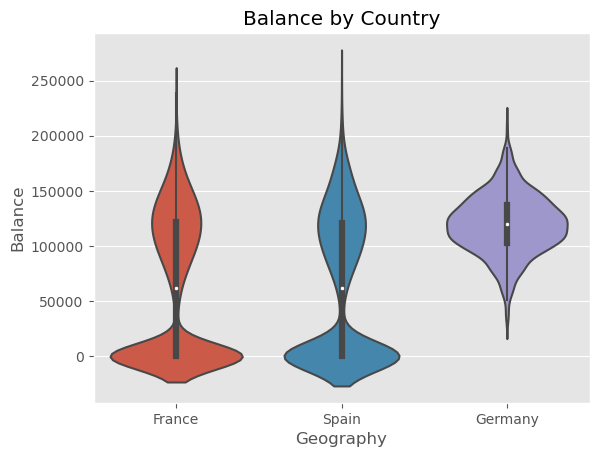

In [103]:
sns.violinplot(x='Geography', y='Balance', data=df)
plt.title('Balance by Country')

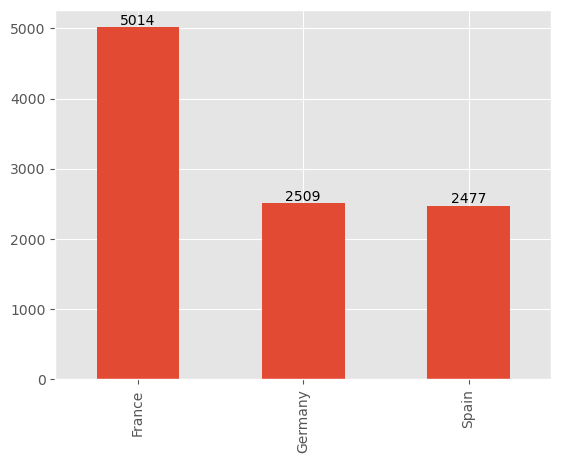

In [104]:
ax = df.Geography.value_counts().plot(kind='bar')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

<Axes: xlabel='CreditScore', ylabel='Density'>

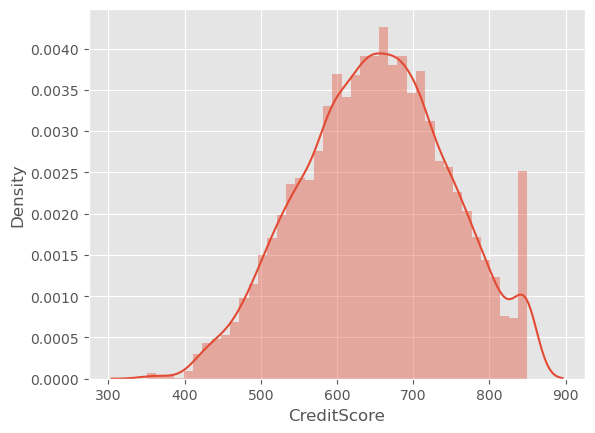

In [105]:
sns.distplot(df['CreditScore'] )

<Axes: xlabel='Tenure', ylabel='CreditScore'>

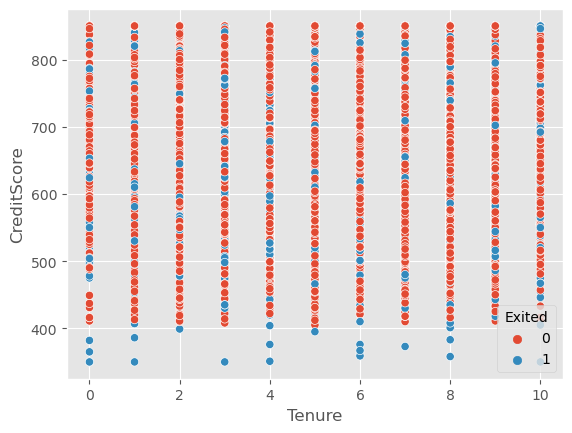

In [106]:
sns.scatterplot(x='Tenure', y='CreditScore', data=df, hue='Exited')

<Axes: xlabel='Age', ylabel='Balance'>

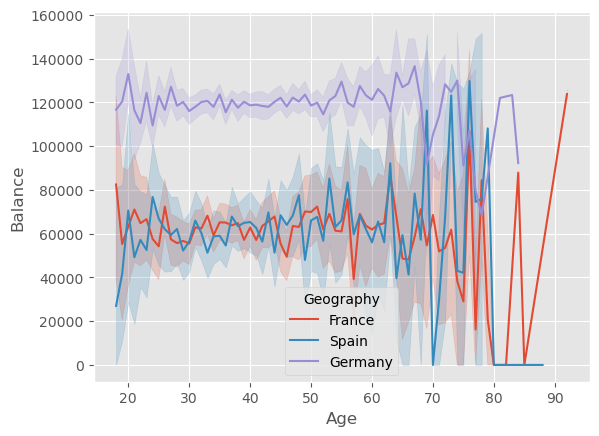

In [107]:
sns.lineplot(x='Age', y='Balance', hue='Geography', data=df )

<Axes: xlabel='Age', ylabel='Count'>

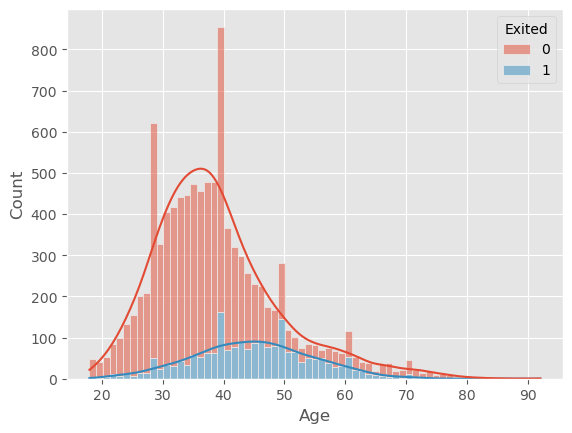

In [108]:
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', kde=True)

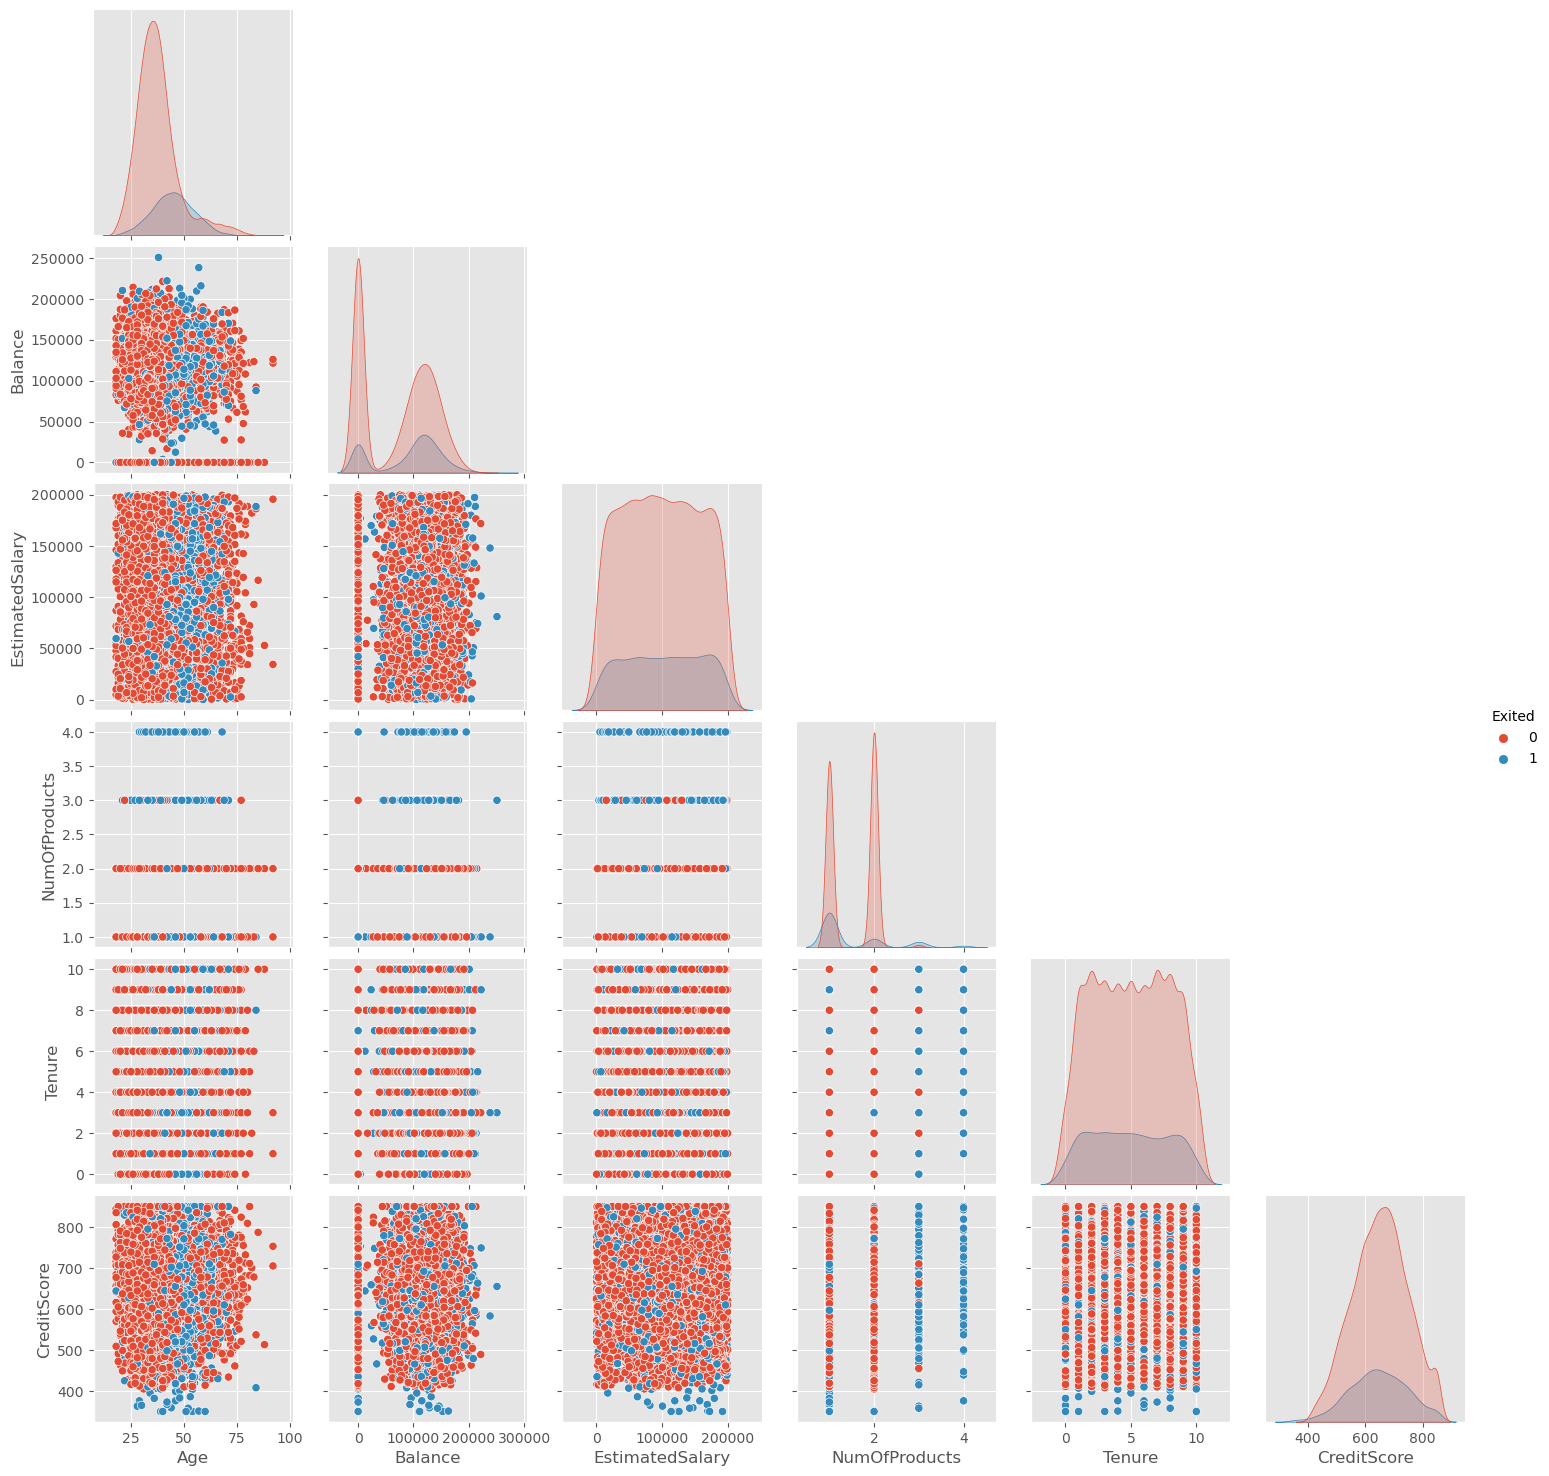

In [109]:
# Correlation

numerical_cols = ['Age', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'CreditScore']
df_num = df[numerical_cols + ['Exited']]
sns.pairplot(df_num, hue='Exited', corner=True)
plt.show()

<Axes: >

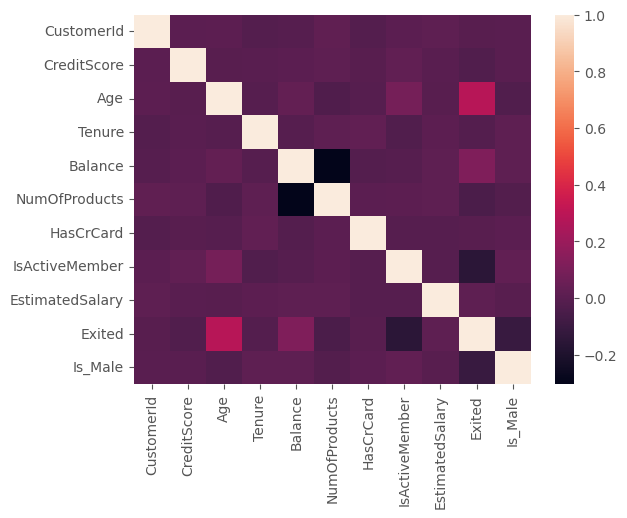

In [110]:
sns.heatmap(df.corr(), annot=False)

# Feature Engineering

In [111]:
def df_preproc(df):

    #columns_to_encode = ['Geography']
    #onehot_encoder = OneHotEncoder(sparse=False)
    #onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df)[columns_to_encode])
    #df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

    df_orig = df.copy()

    df = pd.get_dummies(df.iloc[:,2:], drop_first=True)

    cols_for_scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

    st_scaler = StandardScaler()
    scaled_cols = st_scaler.fit_transform(df[cols_for_scaling])

    scaled_df = pd.DataFrame(scaled_cols, columns=cols_for_scaling)

    df = pd.concat([df.drop(columns=cols_for_scaling), scaled_df], axis=1)

    return df

In [112]:
df = df_preproc(df)

df

NumOfProducts  HasCrCard  IsActiveMember  Exited  Is_Male  \
0                 1          1               1       1        0   
1                 1          0               1       0        0   
2                 3          1               0       1        0   
3                 2          0               0       0        0   
4                 1          1               1       0        0   
...             ...        ...             ...     ...      ...   
9995              2          1               0       0        1   
9996              1          1               1       0        1   
9997              1          0               1       1        0   
9998              2          1               0       1        1   
9999              1          1               0       0        0   

      Geography_Germany  Geography_Spain  CreditScore       Age    Tenure  \
0                     0                0    -0.326221  0.293517 -1.041760   
1                     0                1    -0.440036  0.198164 -1.387538   
2                     0                0    -1.536794  0.293517  1.032908   
3                     0                0     0.501521  0.007457 -1.387538   
4                     0                1     2.063884  0.388871 -1.041760   
...                 ...              ...          ...       ...       ...   
9995                  0                0     1.246488  0.007457 -0.004426   
9996                  0                0    -1.391939 -0.373958  1.724464   
9997                  0                0     0.604988 -0.278604  0.687130   
9998                  1                0     1.256835  0.293517 -0.695982   
9999                  0                0     1.463771 -1.041433 -0.350204   

       Balance  EstimatedSalary  
0    -1.225848         0.021886  
1     0.117350         0.216534  
2     1.333053         0.240687  
3    -1.225848        -0.108918  
4     0.785728        -0.365276  
...        ...              ...  
9995 -1.225848        -0.066419  
9996 -0.306379         0.027988  
9997 -1.225848        -1.008643  
9998 -0.022608        -0.125231  
9999  0.859965        -1.076370  

[10000 rows x 12 columns]

In [113]:
#splitting into x, y

y = df.Exited
X = df.drop(columns=['Exited'])

print(y.shape)
print(x.shape)

(10000,)
(10000, 11)


In [114]:
# splitting into train_test

rand_seed=1

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=rand_seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


# Model Selection And Training

Accuracy Score is 81.2%


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression prediction')

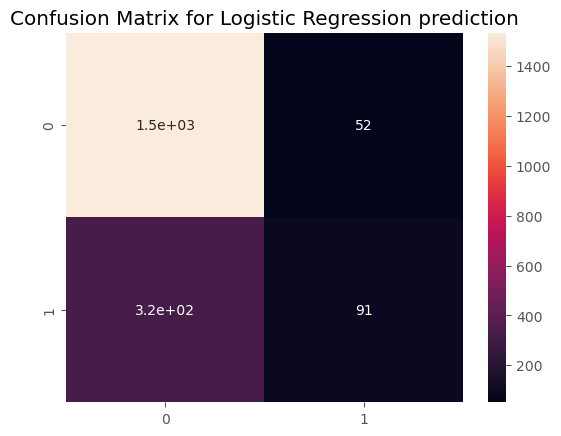

In [123]:
# Logistic regression

log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

log_reg_pred = log_reg_model.predict(X_test)

# showing accuracy
log_reg_accuracy = round(metrics.accuracy_score(y_test,log_reg_pred)*100,2)

print( "Accuracy Score is {}%".format(log_reg_accuracy))

# confusion matrix

ConfusionMatrix_logreg = confusion_matrix(y_test, log_reg_pred)

sns.heatmap(ConfusionMatrix_logreg,annot=True)
plt.title('Confusion Matrix for Logistic Regression prediction')

Accuracy Score is 81.25%


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression prediction')

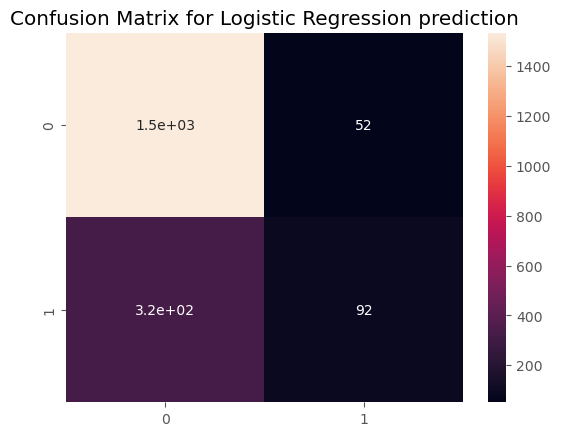

In [161]:
# Lasso Regression

las_reg_model = LogisticRegression(penalty='l1', solver='liblinear')

las_reg_model.fit(X_train, y_train)

las_reg_pred = las_reg_model.predict(X_test)

# showing accuracy
las_reg_accuracy = round(metrics.accuracy_score(y_test,las_reg_pred)*100,2)

print( "Accuracy Score is {}%".format(las_reg_accuracy))

# confusion matrix

ConfusionMatrix_lasreg = confusion_matrix(y_test, las_reg_pred)

sns.heatmap(ConfusionMatrix_lasreg,annot=True)
plt.title('Confusion Matrix for Logistic Regression prediction')

Accuracy Score is 85.65%


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine prediction')

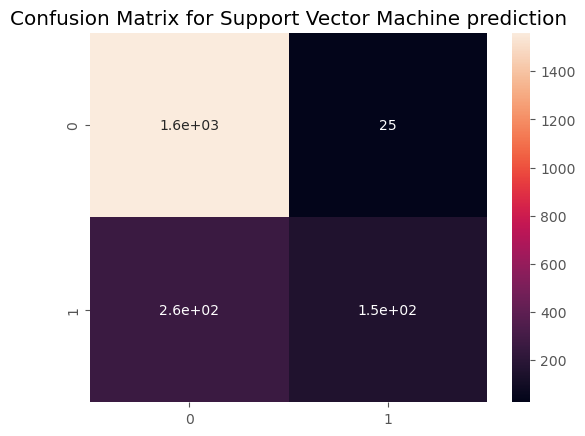

In [131]:
# Support Vector Machine

svc_model = SVC(kernel='rbf',random_state=rand_seed,probability=True)

svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

svc_accuracy = round(metrics.accuracy_score(y_test,svc_pred)*100,2)

print( "Accuracy Score is {}%".format(svc_accuracy))

# confusion matrix

ConfusionMatrix_svc = confusion_matrix(y_test, svc_pred)

sns.heatmap(ConfusionMatrix_svc,annot=True)
plt.title('Confusion Matrix for Support Vector Machine prediction')

Accuracy Score is 84%


Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbor prediction')

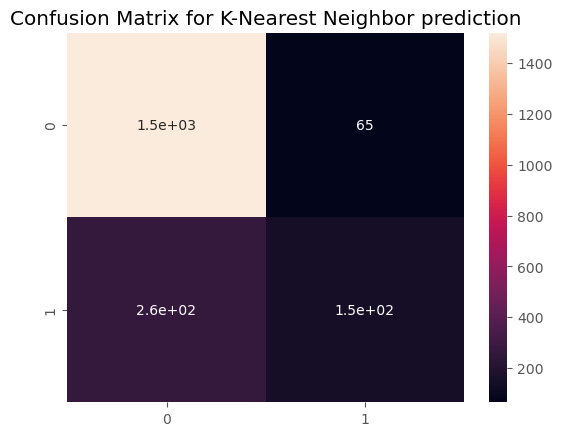

In [143]:
# KNN

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski',p=2)

knn_model.fit(X_train,y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = round(metrics.accuracy_score(y_test,knn_pred)*100)

print( "Accuracy Score is {}%".format(knn_accuracy))

# confusion matrix

ConfusionMatrix_knn = confusion_matrix(y_test, knn_pred)

sns.heatmap(ConfusionMatrix_knn,annot=True)
plt.title('Confusion Matrix for K-Nearest Neighbor prediction')

Accuracy Score is 86.7%


Text(0.5, 1.0, 'Confusion Matrix for Random Forest prediction')

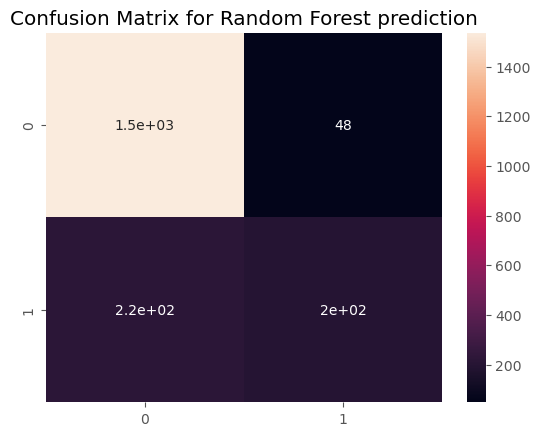

In [153]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=150, criterion='entropy',random_state=rand_seed)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred)*100,2)

print( "Accuracy Score is {}%".format(rf_accuracy))

# confusion matrix

ConfusionMatrix_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(ConfusionMatrix_rf,annot=True)
plt.title('Confusion Matrix for Random Forest prediction')

Accuracy Score is 83.15%


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes prediction')

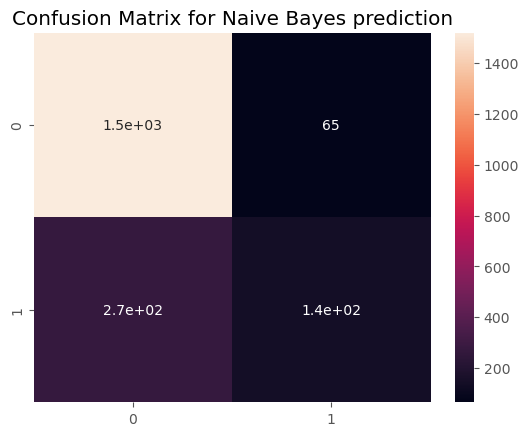

In [163]:
# Naive Bayes

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_accuracy = round(metrics.accuracy_score(y_test, nb_pred)*100,2)

print( "Accuracy Score is {}%".format(nb_accuracy))

# confusion matrix

ConfusionMatrix_nb = confusion_matrix(y_test, nb_pred)

sns.heatmap(ConfusionMatrix_nb,annot=True)
plt.title('Confusion Matrix for Naive Bayes prediction')

# Models Comparison